In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/MyDrive/[BOAZ] 천안시 공모전/new_final_data.csv',encoding='utf-8')
data

,시도별,행정구역별,고용률,청년고용률 (20-39세),청년인구비율 (20-39세),총인구(명),청년인구(명) (20-39세),상용직비중(상용/임금),지역 전문화 지수,전체종사자 (명),대졸자 이상,경제활동 참가율,인구이동률 (20-39세),산업특화지수,GRDP(당해년가격),GRDP(2015년기준년가격(연쇄))
0,경기도,수원시,61.9,70.570,0.304303,1216349,370139,80.65,4.163660,389902.5,504194.5,63.50,0.020116,0.843229,35684685,32667337
1,경기도,성남시,61.0,71.299,0.273689,904690,247604,77.65,4.184815,459748.0,405813.0,62.85,-0.002116,1.336804,50302710,45085311
2,경기도,의정부시,57.3,65.368,0.262574,455128,119505,76.75,1.136984,99283.5,144905.5,58.95,0.008173,0.573841,7388564,6705270
3,경기도,안양시,59.0,69.022,0.272825,540789,147541,81.80,3.905898,226745.5,237170.5,61.05,0.010967,1.102957,18439904,17210240
4,경기도,부천시,59.7,68.907,0.271413,810142,219883,75.10,4.788460,242352.5,275909.5,61.90,-0.025790,0.786926,17940553,16867923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,경상남도,함양군,68.9,63.924,0.125774,36017,4530,66.85,0.657326,9761.0,7170.0,69.60,-0.063467,0.712910,1082102,976924
150,경상남도,거창군,67.0,66.227,0.165701,58702,9727,71.65,0.988607,15964.5,14372.5,67.70,-0.048137,0.715402,1645349,1490226
151,경상남도,합천군,68.0,68.396,0.118407,40082,4746,64.40,0.430342,11031.0,6393.0,68.60,-0.056384,0.723958,1183426,1072107
152,제주특별자치도,제주시,67.2,71.860,0.254082,495281,125842,72.70,1.885606,170564.0,196825.5,68.70,-0.000757,0.905907,14681431,13321338


## **전체고용률 데이터**

In [3]:
data1 = data.drop(data.columns[[3, 5, 6, 9, 15]], axis=1)
data1

,시도별,행정구역별,고용률,청년인구비율 (20-39세),상용직비중(상용/임금),지역 전문화 지수,대졸자 이상,경제활동 참가율,인구이동률 (20-39세),산업특화지수,GRDP(당해년가격)
0,경기도,수원시,61.9,0.304303,80.65,4.163660,504194.5,63.50,0.020116,0.843229,35684685
1,경기도,성남시,61.0,0.273689,77.65,4.184815,405813.0,62.85,-0.002116,1.336804,50302710
2,경기도,의정부시,57.3,0.262574,76.75,1.136984,144905.5,58.95,0.008173,0.573841,7388564
3,경기도,안양시,59.0,0.272825,81.80,3.905898,237170.5,61.05,0.010967,1.102957,18439904
4,경기도,부천시,59.7,0.271413,75.10,4.788460,275909.5,61.90,-0.025790,0.786926,17940553
...,...,...,...,...,...,...,...,...,...,...,...
149,경상남도,함양군,68.9,0.125774,66.85,0.657326,7170.0,69.60,-0.063467,0.712910,1082102
150,경상남도,거창군,67.0,0.165701,71.65,0.988607,14372.5,67.70,-0.048137,0.715402,1645349
151,경상남도,합천군,68.0,0.118407,64.40,0.430342,6393.0,68.60,-0.056384,0.723958,1183426
152,제주특별자치도,제주시,67.2,0.254082,72.70,1.885606,196825.5,68.70,-0.000757,0.905907,14681431


In [4]:
data1.columns = [
    "city", "region", "emp", "youth_pop", "regular_emp",
    "regional_specialization", "high_edu_pop", "econ_activity",
    "pop_mobility", "industry_specialization", "GRDP"
]
data1

,city,region,emp,youth_pop,regular_emp,regional_specialization,high_edu_pop,econ_activity,pop_mobility,industry_specialization,GRDP
0,경기도,수원시,61.9,0.304303,80.65,4.163660,504194.5,63.50,0.020116,0.843229,35684685
1,경기도,성남시,61.0,0.273689,77.65,4.184815,405813.0,62.85,-0.002116,1.336804,50302710
2,경기도,의정부시,57.3,0.262574,76.75,1.136984,144905.5,58.95,0.008173,0.573841,7388564
3,경기도,안양시,59.0,0.272825,81.80,3.905898,237170.5,61.05,0.010967,1.102957,18439904
4,경기도,부천시,59.7,0.271413,75.10,4.788460,275909.5,61.90,-0.025790,0.786926,17940553
...,...,...,...,...,...,...,...,...,...,...,...
149,경상남도,함양군,68.9,0.125774,66.85,0.657326,7170.0,69.60,-0.063467,0.712910,1082102
150,경상남도,거창군,67.0,0.165701,71.65,0.988607,14372.5,67.70,-0.048137,0.715402,1645349
151,경상남도,합천군,68.0,0.118407,64.40,0.430342,6393.0,68.60,-0.056384,0.723958,1183426
152,제주특별자치도,제주시,67.2,0.254082,72.70,1.885606,196825.5,68.70,-0.000757,0.905907,14681431


In [5]:
X = data1[["youth_pop", "regular_emp",
    "regional_specialization", "high_edu_pop", "econ_activity",
    "pop_mobility", "industry_specialization", "GRDP"]]
y = data1["emp"]

In [6]:
print(X.dtypes)

youth_pop                  float64
regular_emp                float64
regional_specialization    float64
high_edu_pop               float64
econ_activity              float64
pop_mobility               float64
industry_specialization    float64
GRDP                         int64
dtype: object


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scale_columns = ["youth_pop", "regular_emp",
    "regional_specialization", "high_edu_pop", "econ_activity",
    "pop_mobility", "industry_specialization", "GRDP"]
data1[scale_columns] = scaler.fit_transform(data1[scale_columns])

In [8]:
# 덮어쓰기

X = data1[["youth_pop", "regular_emp",
    "regional_specialization", "high_edu_pop", "econ_activity",
    "pop_mobility", "industry_specialization", "GRDP"]]
y = data1["emp"]

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif.round(1)

,features,VIF
0,youth_pop,3.4
1,regular_emp,2.5
2,regional_specialization,3.0
3,high_edu_pop,4.1
4,econ_activity,2.0
5,pop_mobility,1.7
6,industry_specialization,1.6
7,GRDP,3.8


In [11]:
X_var = ["youth_pop", "regular_emp",
    "regional_specialization", "high_edu_pop", "econ_activity",
    "pop_mobility", "industry_specialization", "GRDP"]

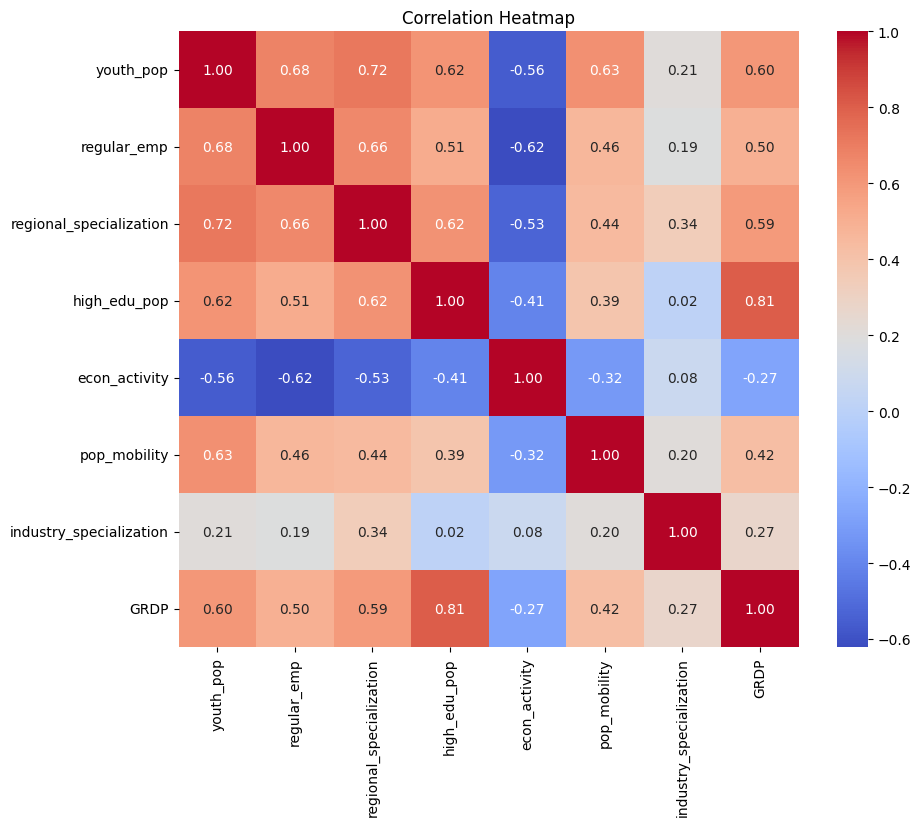

In [12]:
corr_matrix_X = data1[X_var].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_X, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [13]:
print(data1['emp'].describe())

count    154.000000
mean      65.674675
std        5.469207
min       55.700000
25%       61.375000
50%       65.400000
75%       69.450000
max       83.100000
Name: emp, dtype: float64


In [14]:
var = ["emp", "youth_pop", "regular_emp",
    "regional_specialization", "high_edu_pop", "econ_activity",
    "pop_mobility", "industry_specialization", "GRDP"]

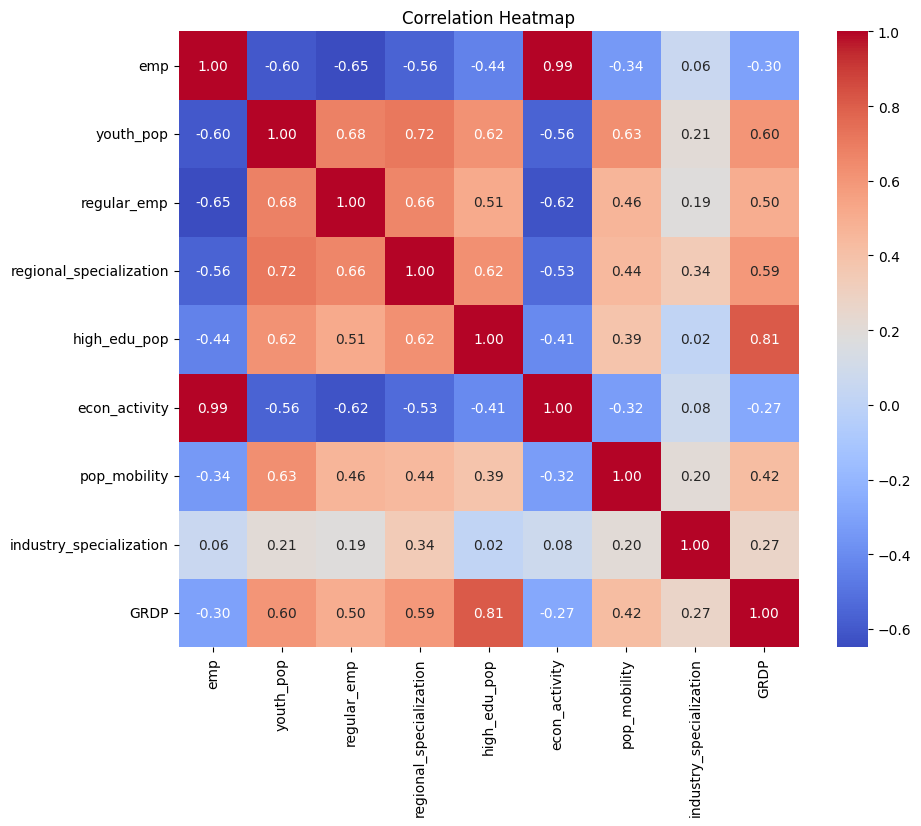

In [15]:
corr_matrix = data1[var].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [16]:
import statsmodels.api as sm
from statsmodels.api import OLS

X_df = sm.add_constant(X)

model = OLS(y, X_df)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    emp   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1916.
Date:                Sat, 24 Aug 2024   Prob (F-statistic):          6.14e-143
Time:                        16:00:08   Log-Likelihood:                -120.10
No. Observations:                 154   AIC:                             258.2
Df Residuals:                     145   BIC:                             285.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [17]:
X = data1[["youth_pop", "regular_emp",
    "regional_specialization", "high_edu_pop",
    "pop_mobility", "industry_specialization", "GRDP"]]
y = data1["emp"]

In [18]:
X_df = sm.add_constant(X)

model = OLS(y, X_df)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    emp   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     25.79
Date:                Sat, 24 Aug 2024   Prob (F-statistic):           1.02e-22
Time:                        16:00:08   Log-Likelihood:                -417.70
No. Observations:                 154   AIC:                             851.4
Df Residuals:                     146   BIC:                             875.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [19]:
X = data1[["youth_pop", "regular_emp",
    "regional_specialization",
    "industry_specialization", "GRDP"]]
y = data1["emp"]

In [20]:
X_df = sm.add_constant(X)

model = OLS(y, X_df)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    emp   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     36.03
Date:                Sat, 24 Aug 2024   Prob (F-statistic):           5.24e-24
Time:                        16:00:08   Log-Likelihood:                -418.37
No. Observations:                 154   AIC:                             848.7
Df Residuals:                     148   BIC:                             867.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

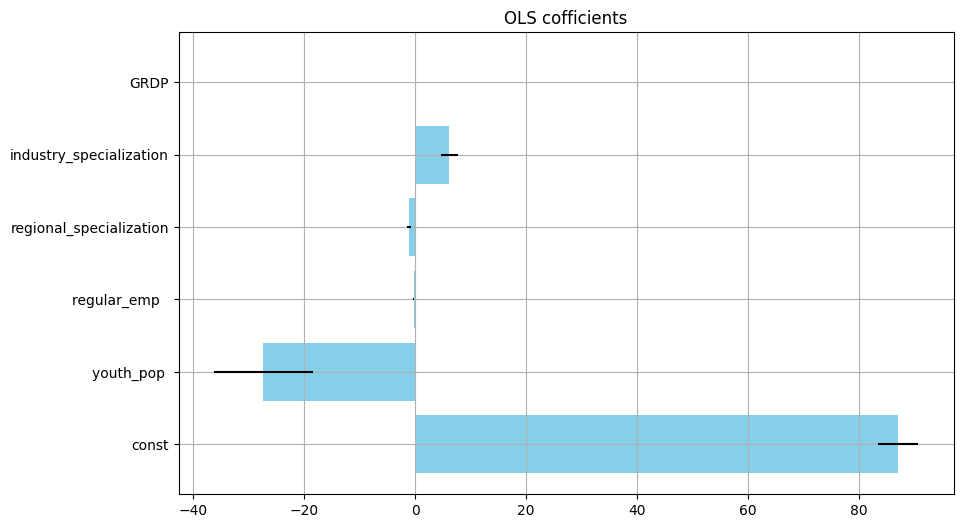

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# 회귀 분석 결과에서 가져온 계수와 표준 오차
coefficients = np.array([87.0368, -27.3604, -0.2834, -1.0619, 6.1415, 7.847e-08])
errors = np.array([3.652, 8.931, 0.056, 0.345, 1.509, 3.45e-08])
labels = ['const', 'youth_pop ', 'regular_emp  ', 'regional_specialization', 'industry_specialization', 'GRDP']

# 바 그래프 생성
plt.figure(figsize=(10, 6))
plt.barh(labels, coefficients, xerr=errors, color='skyblue')
plt.title('OLS cofficients')
plt.grid(True)
plt.show()


In [22]:
X_var = ["youth_pop", "regular_emp",
    "regional_specialization",
    "industry_specialization", "GRDP"]

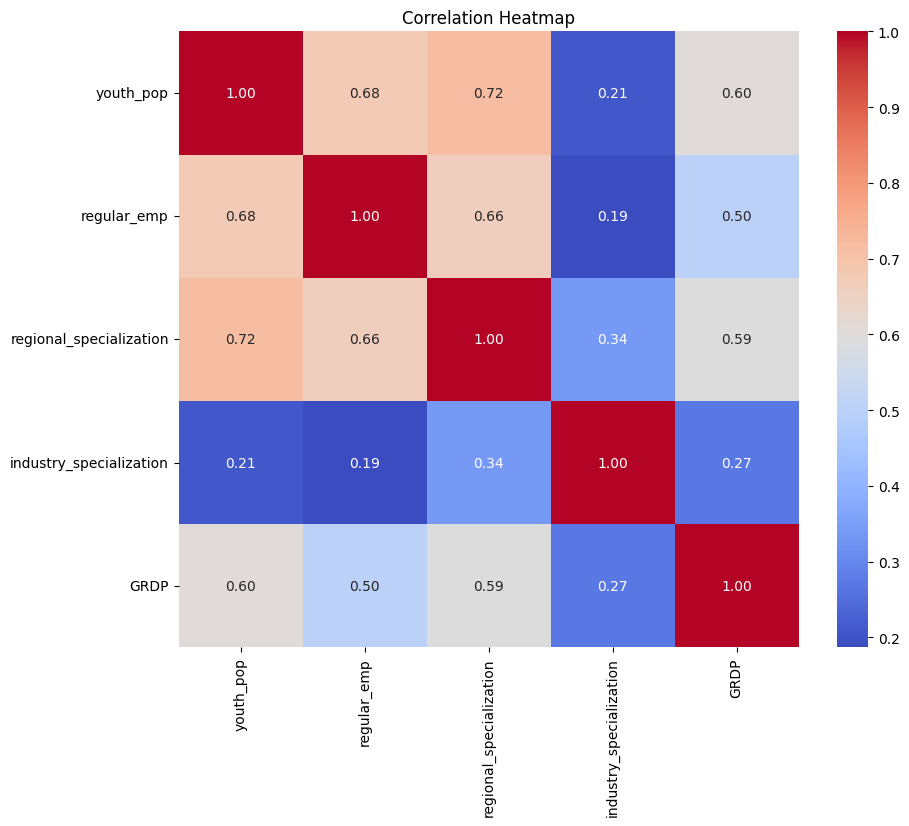

In [23]:
corr_matrix_X = data1[X_var].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_X, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()